# Business Task
## Questions:
1. What was the best month for sales? How much?
2. What city has the best sales?
3. What time should we display ads to maximize the likelihood of customer's buying product?
4. What products are most often sold together?
5. What product sold the most? Why?

# 1. Set up the environment


In [39]:
import pandas as pd # data structure and data analysis
import os # Import multiple csv files
import glob 
import matplotlib.pyplot as plt # Data visualization 
from itertools import combinations # Check combination - used for Question 4
from collections import Counter

# 2. Clean and Preprocess data


## 2.1. Import & Merge 12 months data

In [2]:
# Import & Merge 12 csv files of 12 months sales data 
path = r"C:\Users\Admin\OneDrive\Tài liệu\DA Projects\Python\DATA"    # Path to folder 
all_files = glob.glob(os.path.join(path, "*.csv"))

df_from_each_file = (pd.read_csv(f) for f in all_files)
df = pd.concat(df_from_each_file, ignore_index=True) # Merge 
df.to_csv('AnnualSales2019.csv', index = False) # Save concatnated file

#View dataframe
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


## 2.2. Add 'Month' column

In [3]:
# Create Month colum from Order Date column
df['Month'] = df['Order Date'].str[0:2] 

In [4]:
# Check unique values
print(set(df['Month'])) 

{nan, '04', '12', '10', '08', '02', '11', '03', '05', '06', '09', 'Or', '01', '07'}


As can be seen, there are 'nan' & 'or' values which needs to be removed.

## 2.3. Remove 'nan' & 'or' values in Month column

In [5]:
# Remove 'nan' values
df = df.dropna(how='all') 

In [6]:
# Remove 'or' values
df = df[df['Month'] != 'Or'] 

# 3. Reporting

## 3.1. What was the best month for sales? How much?

In [7]:
# Checking data types
print("Data type of 'Quantity Ordered':" + str(df['Quantity Ordered'].dtypes))
print("Data type of 'Price Each'" + str(df['Price Each'].dtypes))

Data type of 'Quantity Ordered':object
Data type of 'Price Each'object


In [8]:
# Convert data type from object -> int/float
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'], downcast = 'integer') 
df['Price Each'] = pd.to_numeric(df['Price Each'], downcast = 'float')

In [9]:
# Create Sales column
df['Sales'] = df['Quantity Ordered'] * df['Price Each'] 

# View dataframe
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,141234,iPhone,1,700.000000,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01,700.000000
1,141235,Lightning Charging Cable,1,14.950000,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01,14.950000
2,141236,Wired Headphones,2,11.990000,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01,23.980000
3,141237,27in FHD Monitor,1,149.990005,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01,149.990005
4,141238,Wired Headphones,1,11.990000,01/25/19 11:59,"387 10th St, Austin, TX 73301",01,11.990000


In [10]:
# Move Sales column from last to 4th column for easier reading  
moving_column = df.pop('Sales') 
df.insert (4, 'Sales', moving_column)

In [33]:
# Calculate Sales by month
sales_value = df.groupby('Month').sum()['Sales'] 
sales_value

Month
01    1822256.75
02    2202022.50
03    2807100.25
04    3390670.25
05    3152606.75
06    2577802.25
07    2647775.75
08    2244467.75
09    2097560.00
10    3736726.75
11    3199603.25
12    4613443.50
Name: Sales, dtype: float32

In [12]:
# Find month with the highest sales
print('The highest monthly sales is:' + str(sales_value.max()))

The highest monthly sales is:4613443.5


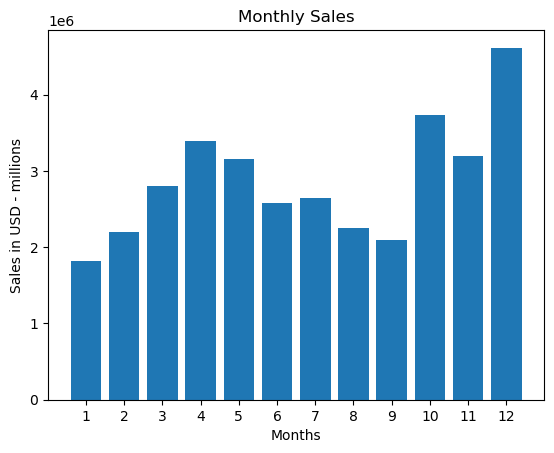

In [53]:
# Plot 'Monthly Sales' Bar chart
months = range(1,13)
plt.bar(x = months, height = sales_value)
plt.xticks(months)
plt.xlabel('Months')
plt.ylabel('Sales in USD - millions')
plt.title('Monthly Sales')
plt.show()

Sales was higher in the final months of the year. One possible reason is that the time from October to December was the Holiday season, having numerous major holidays such as Halloween, Thanksgiving, Black Friday, Christmas, etc. According to the National Retail Federation, the period between Thanksgiving and Christmas brings in more sales than any other time of year for most small businesses. On average, holiday sales represent 20 percent of annual sales across most industries. 

## 3.2. What city has the best sales?

In [14]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month
0,141234,iPhone,1,700.000000,700.000000,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01
1,141235,Lightning Charging Cable,1,14.950000,14.950000,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01
2,141236,Wired Headphones,2,11.990000,23.980000,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01
3,141237,27in FHD Monitor,1,149.990005,149.990005,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01
4,141238,Wired Headphones,1,11.990000,11.990000,01/25/19 11:59,"387 10th St, Austin, TX 73301",01


In [15]:
# Create 'City' column from 'Address' column
address_to_city = lambda address: address.split(',')[1] 
df['City'] = df['Purchase Address'].apply(address_to_city) 
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,City
0,141234,iPhone,1,700.000000,700.000000,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01,Boston
1,141235,Lightning Charging Cable,1,14.950000,14.950000,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01,Portland
2,141236,Wired Headphones,2,11.990000,23.980000,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01,San Francisco
3,141237,27in FHD Monitor,1,149.990005,149.990005,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01,Los Angeles
4,141238,Wired Headphones,1,11.990000,11.990000,01/25/19 11:59,"387 10th St, Austin, TX 73301",01,Austin


In [16]:
# Calculate Sales by Cities
sales_value_city = df.groupby('City').sum()['Sales']
sales_value_city

City
 Atlanta          2795498.50
 Austin           1819581.75
 Boston           3661642.00
 Dallas           2767975.50
 Los Angeles      5452571.00
 New York City    4664317.50
 Portland         2320490.50
 San Francisco    8262204.00
 Seattle          2747755.50
Name: Sales, dtype: float32

In [17]:
# Find City with the highest sales
sales_value_city.max() 

8262204.0

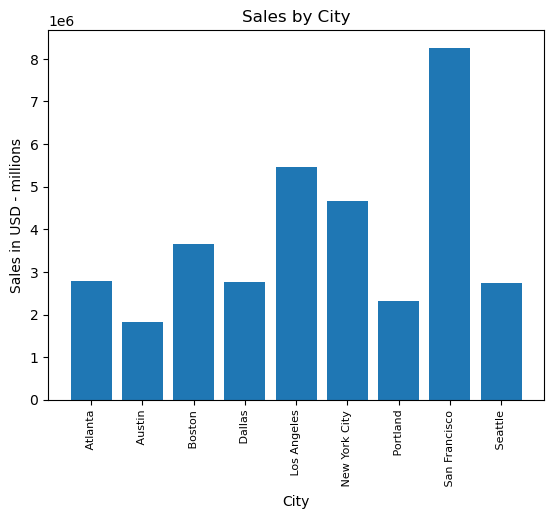

In [57]:
# Plot 'Sales by City' Bar chart
cities = df['City'].unique()
cities.sort()
plt.bar(x = cities , height = sales_value_city)
plt.xticks(cities, rotation = 90, size = 8)
plt.xlabel('City')
plt.ylabel('Sales in USD - millions')
plt.title('Sales by City')
plt.show()

Top 3 cities with the highest sales: San Francisco, Los Angeles, and New York City.

## 3.3. What time should we display ads to maximize the likelihood of customer's buying product?

In [19]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,City
0,141234,iPhone,1,700.000000,700.000000,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01,Boston
1,141235,Lightning Charging Cable,1,14.950000,14.950000,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01,Portland
2,141236,Wired Headphones,2,11.990000,23.980000,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01,San Francisco
3,141237,27in FHD Monitor,1,149.990005,149.990005,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01,Los Angeles
4,141238,Wired Headphones,1,11.990000,11.990000,01/25/19 11:59,"387 10th St, Austin, TX 73301",01,Austin


In [58]:
# Convert 'Order Date' column data type from 'object' to 'datetime'
df['Order Date'] = pd.to_datetime(df['Order Date']) 
print("Data type of 'Order Date':" + str(df['Order Date'].dtypes))

Data type of 'Order Date':datetime64[ns]


In [59]:
# Create 'Hour' column from 'Order Date' column
df['Hour'] = df['Order Date'].dt.hour 
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,City,Hour
0,141234,iPhone,1,700.000000,700.000000,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",01,Boston,21
1,141235,Lightning Charging Cable,1,14.950000,14.950000,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",01,Portland,14
2,141236,Wired Headphones,2,11.990000,23.980000,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",01,San Francisco,13
3,141237,27in FHD Monitor,1,149.990005,149.990005,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",01,Los Angeles,20
4,141238,Wired Headphones,1,11.990000,11.990000,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",01,Austin,11


In [60]:
# Calculate total sales by hour
sales_count_hour = df.groupby('Hour').count()['Sales'] 
sales_count_hour

Hour
0      3910
1      2350
2      1243
3       831
4       854
5      1321
6      2482
7      4011
8      6256
9      8748
10    10944
11    12411
12    12587
13    12129
14    10984
15    10175
16    10384
17    10899
18    12280
19    12905
20    12228
21    10921
22     8822
23     6275
Name: Sales, dtype: int64

In [23]:
# Find the hour with the highest sales
sales_count_hour.max() 

12905

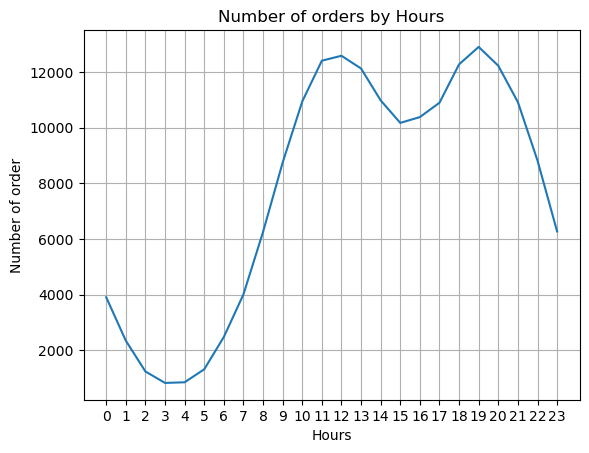

In [61]:
# Plot 'Number of orders by Hours' Bar chart
hours = df['Hour'].unique()
hours.sort()

plt.plot(hours , sales_count_hour)
plt.grid()
plt.xticks(hours)
plt.xlabel('Hours')
plt.ylabel('Number of order')
plt.title('Number of orders by Hours')
plt.show()

Customers tend to shopping more in the 11:00 - 13:00 & 18:00 - 20:00 window.
Hence, the company should display ads 30 minutes before these 2 windows to maximize the likelihood of customer's buying product.

## 3.4. What products are most often sold together?

In [62]:
# Find rows which had the same Order ID
df_dup = df[df.duplicated('Order ID', keep=False)]
df_dup.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,City,Hour
41,141275,USB-C Charging Cable,1,11.95,11.95,2019-01-07 16:06:00,"610 Walnut St, Austin, TX 73301",01,Austin,16
42,141275,Wired Headphones,1,11.99,11.99,2019-01-07 16:06:00,"610 Walnut St, Austin, TX 73301",01,Austin,16
57,141290,Apple Airpods Headphones,1,150.00,150.00,2019-01-02 08:25:00,"4 1st St, Los Angeles, CA 90001",01,Los Angeles,8
58,141290,AA Batteries (4-pack),3,3.84,11.52,2019-01-02 08:25:00,"4 1st St, Los Angeles, CA 90001",01,Los Angeles,8
133,141365,Vareebadd Phone,1,400.00,400.00,2019-01-10 11:19:00,"20 Dogwood St, New York City, NY 10001",01,New York City,11


In [66]:
# Combine products of the same Order ID into the column 'All products'
group_product = lambda product: ','.join(product)
df_dup['All Products'] = df_dup.groupby('Order ID')['Product'].transform(group_product)
df_dup.head()

C:\Users\Admin\AppData\Local\Temp\ipykernel_18676\497323830.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dup['All Products'] = df_dup.groupby('Order ID')['Product'].transform(group_product)


,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,City,Hour,All Products
41,141275,USB-C Charging Cable,1,11.95,11.95,2019-01-07 16:06:00,"610 Walnut St, Austin, TX 73301",01,Austin,16,"USB-C Charging Cable,Wired Headphones"
42,141275,Wired Headphones,1,11.99,11.99,2019-01-07 16:06:00,"610 Walnut St, Austin, TX 73301",01,Austin,16,"USB-C Charging Cable,Wired Headphones"
57,141290,Apple Airpods Headphones,1,150.00,150.00,2019-01-02 08:25:00,"4 1st St, Los Angeles, CA 90001",01,Los Angeles,8,"Apple Airpods Headphones,AA Batteries (4-pack)"
58,141290,AA Batteries (4-pack),3,3.84,11.52,2019-01-02 08:25:00,"4 1st St, Los Angeles, CA 90001",01,Los Angeles,8,"Apple Airpods Headphones,AA Batteries (4-pack)"
133,141365,Vareebadd Phone,1,400.00,400.00,2019-01-10 11:19:00,"20 Dogwood St, New York City, NY 10001",01,New York City,11,"Vareebadd Phone,Wired Headphones"


In [27]:
df_dup = df_dup[['Order ID','All Products']].drop_duplicates()
df_dup

,Order ID,All Products
41,141275,"USB-C Charging Cable,Wired Headphones"
57,141290,"Apple Airpods Headphones,AA Batteries (4-pack)"
133,141365,"Vareebadd Phone,Wired Headphones"
153,141384,"Google Phone,USB-C Charging Cable"
220,141450,"Google Phone,Bose SoundSport Headphones"
...,...,...
186781,259296,"Apple Airpods Headphones,Apple Airpods Headphones"
186783,259297,"iPhone,Lightning Charging Cable,Lightning Char..."
186791,259303,"34in Ultrawide Monitor,AA Batteries (4-pack)"
186803,259314,"Wired Headphones,AAA Batteries (4-pack)"


In [52]:
# Find top 10 product combinations

count = Counter()

for products in df_dup['All Products']:
    product_list = products.split(",")
    count.update(Counter(combinations(product_list, 2)))

count.most_common(10)

[(('iPhone', 'Lightning Charging Cable'), 1005),
 (('Google Phone', 'USB-C Charging Cable'), 987),
 (('iPhone', 'Wired Headphones'), 447),
 (('Google Phone', 'Wired Headphones'), 414),
 (('Vareebadd Phone', 'USB-C Charging Cable'), 361),
 (('iPhone', 'Apple Airpods Headphones'), 360),
 (('Google Phone', 'Bose SoundSport Headphones'), 220),
 (('USB-C Charging Cable', 'Wired Headphones'), 160),
 (('Vareebadd Phone', 'Wired Headphones'), 143),
 (('Lightning Charging Cable', 'Wired Headphones'), 92)]

Top product combinations: 
- iPhone,Lightning Charging Cable
- Google Phone, USB-C Charging Cable
- iPhone, 'Wired Headphones

Recommendation:
- Pairing the best selling combos with lesser-selling products to improve sales.
- Apply sales promotion on these bestselling combinations to encourage sales.

## 3.5. What product sold the most? Why?

In [29]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,City,Hour
0,141234,iPhone,1,700.000000,700.000000,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",01,Boston,21
1,141235,Lightning Charging Cable,1,14.950000,14.950000,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",01,Portland,14
2,141236,Wired Headphones,2,11.990000,23.980000,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",01,San Francisco,13
3,141237,27in FHD Monitor,1,149.990005,149.990005,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",01,Los Angeles,20
4,141238,Wired Headphones,1,11.990000,11.990000,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",01,Austin,11


In [30]:
# Calculate total orders by product
product_count = df.groupby(['Product']).sum()['Quantity Ordered'] 
product_count

Product
20in Monitor                   4129.0
27in 4K Gaming Monitor         6244.0
27in FHD Monitor               7550.0
34in Ultrawide Monitor         6199.0
AA Batteries (4-pack)         27635.0
AAA Batteries (4-pack)        31017.0
Apple Airpods Headphones      15661.0
Bose SoundSport Headphones    13457.0
Flatscreen TV                  4819.0
Google Phone                   5532.0
LG Dryer                        646.0
LG Washing Machine              666.0
Lightning Charging Cable      23217.0
Macbook Pro Laptop             4728.0
ThinkPad Laptop                4130.0
USB-C Charging Cable          23975.0
Vareebadd Phone                2068.0
Wired Headphones              20557.0
iPhone                         6849.0
Name: Quantity Ordered, dtype: float64

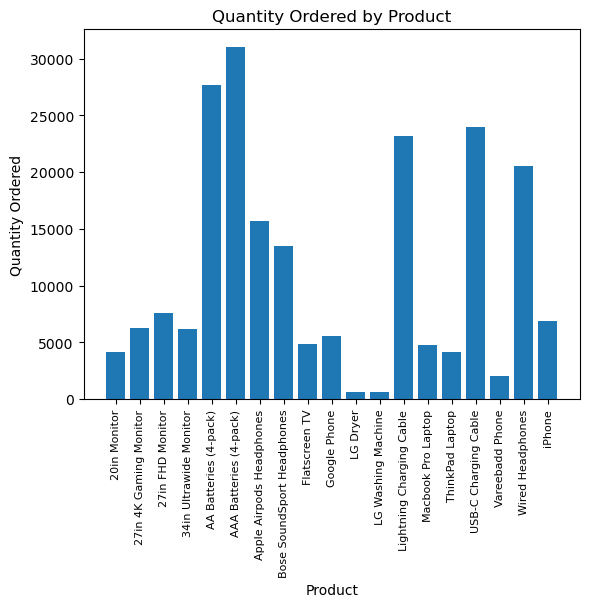

In [31]:
# Plot 'Quantity Ordered by Product' Bar chart
products = df['Product'].unique()
products.sort()
plt.bar(x = products , height = product_count)
plt.xticks(products, rotation = 90, size = 8)
plt.xlabel('Product')
plt.ylabel('Quantity Ordered')
plt.title('Quantity Ordered by Product')
plt.show()

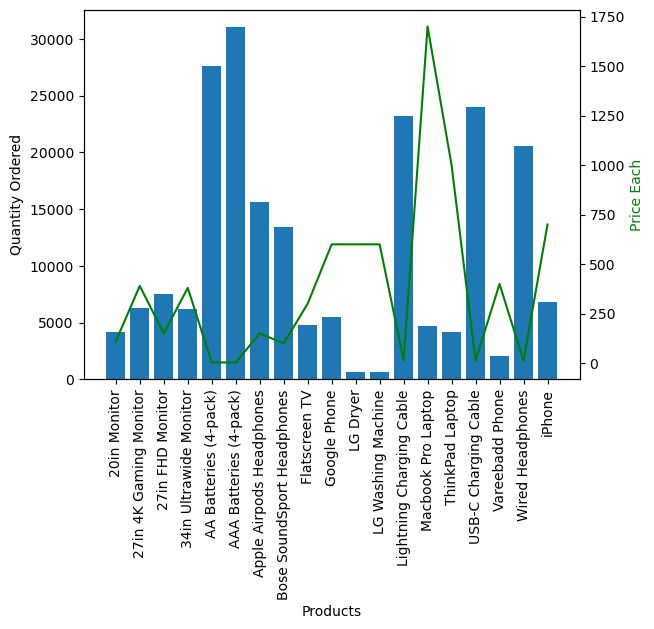

In [32]:
# Plot Quantity Ordered & Price Correalation Chart
prices = df.groupby(['Product']).mean()['Price Each'] 
x = products
y1 = product_count
y2 = prices

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(x, y1)
ax2.plot(x, y2, 'g')
ax1.xaxis.set_ticks(products)
ax1.set_xticklabels( products, rotation = 90)
ax1.set_xlabel('Products')
ax1.set_ylabel('Quantity Ordered')
ax2.set_ylabel('Price Each', color='g')
plt.show()

- **Top 5 products:** AAA Batteries (4-pack), AA Batteries (4-pack), USB-C Charging Cable, Lightning Charging Cable, Wired Headphones.
- There was an inverse proportion between Quantity Ordered and Price. Top selling products are mainly inexpensive. 

Thank you for your interest in my analysis!